# Pruebas de validación Reconocimiento Facial
En estas pruebas se busca validar la tasa de precisión del modelo a utilizar *dlib_face_recognition_resnet_model_v1* a través del framework *face_recognition* el cuál nos otorga funciones para localizar rostros en un fotograma así como extraer 128 valores carácterísticos de cada uno para después compararlos a los de una base de datos dada por un usuario y verificar si los rostros encontrados coinciden con alguno de dicha base.

## Librerías

In [32]:
import cv2
import os
import face_recognition
from sklearn import metrics
import matplotlib.pyplot as plt

## Extraer los encodings de los sujetos y guardarlos en un vector
En esta base de datos de prueba contamos con las fotos de cuatro sujetos (Ariadna, Daniel, Frida y Guillermo), esta base de datos está dividida en dos: 

* *sujetos* : consta de una foto de cada sujeto.
* *dataset_sujetos*: consta con 50 fotos de cada sujeto clasificadas por sujeto.

En esta parte extraemos los encodings (128 características) de cada sujeto que utiliza el modelo para realizar el reconocimiento y los almacenamos en un vector. 

Nota: para este proceso de extracción de encodings y almacenamiento, normalmente se guardan los encodings en un archivo de texto (.txt) para poder acceder de forma más efectiva.

In [113]:
# Vectores que almacenarán las características de los rostros encontrados
sujetos_encodings = []
sujetos_names = []

sujetos_path = os.path.join(os.getcwd(), 'sujetos')  # Usa os.getcwd() para obtener el directorio de trabajo actual
sujetos_path = sujetos_path.replace("\\", "/")

for image_name in os.listdir(sujetos_path):
    img = cv2.imread("sujetos/"+ image_name)
    face_locations = face_recognition.face_locations(img)[0] # Obtiene las coordenadas del rostro en la imagen
    face_encodings = face_recognition.face_encodings(img, known_face_locations=[face_locations])[0] # Obtenemos las características del rostro encontrado
    sujetos_encodings.append(face_encodings)
    sujetos_names.append(image_name.split(".")[0])

print("Sujetos encontrados: ", sujetos_names)
print("Características de los sujetos: ", sujetos_encodings)

Sujetos encontrados:  ['ariadna', 'daniel', 'frida', 'guillermo']
Características de los sujetos:  [array([-4.43450622e-02,  1.11018814e-01,  5.01114838e-02, -8.61894563e-02,
       -6.50194436e-02, -2.57590450e-02, -7.58145563e-03, -5.26424199e-02,
        1.99669063e-01, -8.51735398e-02,  3.12555104e-01, -1.22164860e-01,
       -2.81602800e-01,  4.49467413e-02,  1.81418210e-02,  1.41228691e-01,
       -1.64879337e-01, -3.63382511e-02, -8.86298791e-02,  6.95924386e-02,
        4.85856719e-02, -2.36514974e-02,  8.24610069e-02,  1.01719745e-01,
       -8.19467157e-02, -3.92638654e-01, -7.87886307e-02, -9.14495438e-02,
       -3.97187844e-02, -9.07428414e-02, -7.07499534e-02,  5.64187393e-02,
       -1.11530319e-01, -5.80246113e-02, -3.21706459e-02,  2.19555665e-03,
       -1.06326118e-01, -1.21103674e-01,  2.35986635e-01, -1.82750896e-02,
       -3.02343994e-01, -3.09282690e-02,  5.73494509e-02,  1.90621004e-01,
        1.96314633e-01,  9.59377550e-03,  7.89942220e-04, -8.32018927e-02,


## Prueba de reconocimiento por carpeta
Una vez tenemos los encodings de los sujetos, procedemos a evaluar el rendimiento del modelo utilizado, esto aplicando el reconocimiento facial en cada imagen para comprobar que verdaderamente se trata del sujeto.

In [114]:
datset_path = os.path.join(os.getcwd(), 'dataset_sujetos')  # Usa os.getcwd() para obtener el directorio de trabajo actual
datset_path = datset_path.replace("\\", "/")
y_pred = []
y_true = []
error = []

Realizamos un preprocesamiento en donde revisamos que las imágenes estén nombradas con un nombre estratégico (enumeración del 0 al 49) para poder hacer debugging en caso de ser necesario.

In [59]:
# Iterar sobre todos los archivos en el directorio
for folder in os.listdir(datset_path):
    folder_path = os.path.join(datset_path, folder)
    if os.path.isdir(folder_path):
        for index, image_name in enumerate(os.listdir(folder_path)):
            if image_name.endswith(".jpg"):  # Puedes ajustar la extensión según tus necesidades
                # Construir el nuevo nombre del archivo (por ejemplo, agregar un prefijo)
                new_image_name = f"{index}.jpg"

                # Construir las rutas completas para el archivo antiguo y el nuevo
                old_path = os.path.join(folder_path, image_name)
                new_path = os.path.join(folder_path, new_image_name)

                # Verificar si el nuevo nombre ya existe y ajustar si es necesario
                while os.path.exists(new_path):
                    index += 1
                    new_image_name = f"{index}.jpg"
                    new_path = os.path.join(folder_path, new_image_name)

                # Cambiar el nombre del archivo
                os.rename(old_path, new_path)

                print(f"Archivo renombrado: {image_name} -> {new_image_name}")
print("Dataset renombrado")

Archivo renombrado: 0.jpg -> 2.jpg
Archivo renombrado: 1.jpg -> 3.jpg
Archivo renombrado: 10.jpg -> 4.jpg
Archivo renombrado: 11.jpg -> 5.jpg
Archivo renombrado: 12.jpg -> 6.jpg
Archivo renombrado: 13.jpg -> 7.jpg
Archivo renombrado: 14.jpg -> 8.jpg
Archivo renombrado: 15.jpg -> 9.jpg
Archivo renombrado: 16.jpg -> 10.jpg
Archivo renombrado: 17.jpg -> 11.jpg
Archivo renombrado: 18.jpg -> 12.jpg
Archivo renombrado: 19.jpg -> 13.jpg
Archivo renombrado: 20.jpg -> 14.jpg
Archivo renombrado: 21.jpg -> 15.jpg
Archivo renombrado: 22.jpg -> 16.jpg
Archivo renombrado: 23.jpg -> 17.jpg
Archivo renombrado: 24.jpg -> 18.jpg
Archivo renombrado: 25.jpg -> 19.jpg
Archivo renombrado: 26.jpg -> 20.jpg
Archivo renombrado: 27.jpg -> 21.jpg
Archivo renombrado: 28.jpg -> 22.jpg
Archivo renombrado: 29.jpg -> 23.jpg
Archivo renombrado: 30.jpg -> 24.jpg
Archivo renombrado: 31.jpg -> 25.jpg
Archivo renombrado: 32.jpg -> 26.jpg
Archivo renombrado: 33.jpg -> 27.jpg
Archivo renombrado: 34.jpg -> 28.jpg
Archivo ren

In [115]:
y_true = []
orden_img = []
for folder in os.listdir(datset_path):
    print("Folder: ", folder)
    for image_name in os.listdir(datset_path + "/" + folder):
        y_true.append(folder)
        orden_img.append(image_name)
    print("Orden imagenes: ", orden_img)
    orden_img = []
        
print("Tamano de las reales: ", len(y_true))  
print("Etiquetas reales: ", y_true)

Folder:  ariadna
Orden imagenes:  ['0.jpg', '1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '3.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '4.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
Folder:  daniel
Orden imagenes:  ['0.jpg', '1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '3.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '4.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jp

In [79]:
i = 0
for image_name in os.listdir(datset_path + "/ariadna"):
        y_true.append("ariadna")
        img = cv2.imread(datset_path + "/ariadna/" + image_name)
        print("Imagen: ", image_name)
        face_locations = face_recognition.face_locations(img)# Obtiene las coordenadas del rostro en la imagen
        num = 0
        if face_locations != []:
            print("Detecciones", len(face_locations))
            face_encodings = face_recognition.face_encodings(img, face_locations) # Obtenemos las características del rostro encontrado
            for face_encoding, (top, right, bottom, left) in zip(face_encodings, face_locations):
                matches = face_recognition.compare_faces(sujetos_encodings, face_encoding)
                if True in matches:
                    first_match_index = matches.index(True)
                    name = sujetos_names[first_match_index]
                else:
                    name = "Desconocido"
                if len(face_locations) > 1:
                    cv2.rectangle(img, (left, top), (right, bottom), (0,255,0), 2)
                    cv2.putText(img, name, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
                    num += 1
                    if num > 1:
                        y_pred.append("2R")
                        cv2.imwrite(f"./errores/imagen_creada_{i}.jpg", img)
                        i += 1
                    error.append(name)
                else:
                    y_pred.append(name)
        else:
            print("No se ha encontrado ningún rostro en la imagen")
            y_pred.append("NR")
print("Predicciones finales: ", len(y_pred))
print("Numero de Errores: ", i)
print("Error: ", error)

Imagen:  0.jpg
Detecciones 1
Imagen:  1.jpg
Detecciones 1
Imagen:  10.jpg
Detecciones 1
Imagen:  11.jpg
Detecciones 1
Imagen:  12.jpg
Detecciones 1
Imagen:  13.jpg
Detecciones 1
Imagen:  14.jpg
Detecciones 1
Imagen:  15.jpg
Detecciones 1
Imagen:  16.jpg
Detecciones 1
Imagen:  17.jpg
Detecciones 1
Imagen:  18.jpg
Detecciones 1
Imagen:  19.jpg
Detecciones 1
Imagen:  2.jpg
Detecciones 1
Imagen:  20.jpg
Detecciones 1
Imagen:  21.jpg
Detecciones 1
Imagen:  22.jpg
Detecciones 1
Imagen:  23.jpg
Detecciones 1
Imagen:  24.jpg
Detecciones 1
Imagen:  25.jpg
Detecciones 1
Imagen:  26.jpg
Detecciones 1
Imagen:  27.jpg
Detecciones 2
Imagen:  28.jpg
Detecciones 1
Imagen:  29.jpg
Detecciones 1
Imagen:  3.jpg
Detecciones 1
Imagen:  30.jpg
Detecciones 1
Imagen:  31.jpg
Detecciones 1
Imagen:  32.jpg
Detecciones 1
Imagen:  33.jpg
Detecciones 1
Imagen:  34.jpg
Detecciones 1
Imagen:  35.jpg
Detecciones 1
Imagen:  36.jpg
Detecciones 1
Imagen:  37.jpg
Detecciones 1
Imagen:  38.jpg
Detecciones 1
Imagen:  39.jp

In [74]:
img = cv2.imread(datset_path + "/ariadna/" + "8.jpg")
face_locations = face_recognition.face_locations(img)# Obtiene las coordenadas del rostro en la imagen
num = 0
if face_locations != []:
    print(len(face_locations))
    face_encodings = face_recognition.face_encodings(img, face_locations) # Obtenemos las características del rostro encontrado
    for face_encoding, (top, right, bottom, left) in zip(face_encodings, face_locations):
        matches = face_recognition.compare_faces(sujetos_encodings, face_encoding)
        if True in matches:
            first_match_index = matches.index(True)
            name = sujetos_names[first_match_index]
        else:
            name = "Desconocido"
        if len(face_locations) > 1:
            cv2.rectangle(img, (left, top), (right, bottom), (0,255,0), 2)
            cv2.putText(img, name, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
            num += 1
            if num > 1:
                y_pred.append("2R")
                cv2.imwrite('imagen_creada.jpg', img)
            error.append(name)
        else:
            y_pred.append(name)
else:
    print("No se ha encontrado ningún rostro en la imagen")
print("Predicciones: ", y_pred)
print("Errores: ", error)

2
Etiquetas reales:  ['2R']
Error:  ['ariadna', 'Desconocido']


In [98]:
y_pred = []
error = []
num_MR = 0
num_NR = 0
for folder in os.listdir(datset_path):
    print("Folder: ", folder)
    for image_name in os.listdir(datset_path + "/"+ folder):
            img = cv2.imread(datset_path + "/"+ folder +"/" + image_name)
            print("Imagen: ", image_name)
            face_locations = face_recognition.face_locations(img)# Obtiene las coordenadas del rostro en la imagen
            if face_locations != []:
                print("Detecciones", len(face_locations))
                face_encodings = face_recognition.face_encodings(img, face_locations) # Obtenemos las características del rostro encontrado
                for face_encoding, (top, right, bottom, left) in zip(face_encodings, face_locations):
                    matches = face_recognition.compare_faces(sujetos_encodings, face_encoding)
                    if True in matches:
                        first_match_index = matches.index(True)
                        name = sujetos_names[first_match_index]
                    else:
                        name = "Desconocido"
                    cv2.rectangle(img, (left, top), (right, bottom), (0,255,0), 2)
                    cv2.putText(img, name, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
                if len(face_locations) > 1:
                    y_pred.append("MR")
                    cv2.imwrite("./resultados_FR/errores/"+folder+"_"+image_name, img)
                    num_MR += 1
                else:
                    y_pred.append(name)
                    cv2.imwrite("./resultados_FR/"+folder+"_"+image_name, img)
                    
            else:
                print("No se ha encontrado ningún rostro en la imagen: "+folder+"_"+image_name)
                y_pred.append("NR")
                num_NR += 1
print("Predicciones finales: ", len(y_pred))
print("Numero de NR: ", num_NR)
print("Numero de MR: ", num_MR)

Folder:  ariadna
Imagen:  0.jpg
Detecciones 1
Imagen:  1.jpg
Detecciones 1
Imagen:  10.jpg
Detecciones 1
Imagen:  11.jpg
Detecciones 1
Imagen:  12.jpg
Detecciones 1
Imagen:  13.jpg
Detecciones 1
Imagen:  14.jpg
Detecciones 1
Imagen:  15.jpg
Detecciones 1
Imagen:  16.jpg
Detecciones 1
Imagen:  17.jpg
Detecciones 1
Imagen:  18.jpg
Detecciones 1
Imagen:  19.jpg
Detecciones 1
Imagen:  2.jpg
Detecciones 1
Imagen:  20.jpg
Detecciones 1
Imagen:  21.jpg
Detecciones 1
Imagen:  22.jpg
Detecciones 1
Imagen:  23.jpg
Detecciones 1
Imagen:  24.jpg
Detecciones 1
Imagen:  25.jpg
Detecciones 1
Imagen:  26.jpg
Detecciones 1
Imagen:  27.jpg
Detecciones 2
Imagen:  28.jpg
Detecciones 1
Imagen:  29.jpg
Detecciones 1
Imagen:  3.jpg
Detecciones 1
Imagen:  30.jpg
Detecciones 1
Imagen:  31.jpg
Detecciones 1
Imagen:  32.jpg
Detecciones 1
Imagen:  33.jpg
Detecciones 1
Imagen:  34.jpg
Detecciones 1
Imagen:  35.jpg
Detecciones 1
Imagen:  36.jpg
Detecciones 1
Imagen:  37.jpg
Detecciones 1
Imagen:  38.jpg
Detecciones

In [116]:
print(len(y_true))
print(len(y_pred))
print(y_true)
print(y_pred)

200
200
['ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', '

## Métricas
Una de las métricas a evaluar es la cantidad de verdaderos positivos, esto gracias a una matriz de confusión.

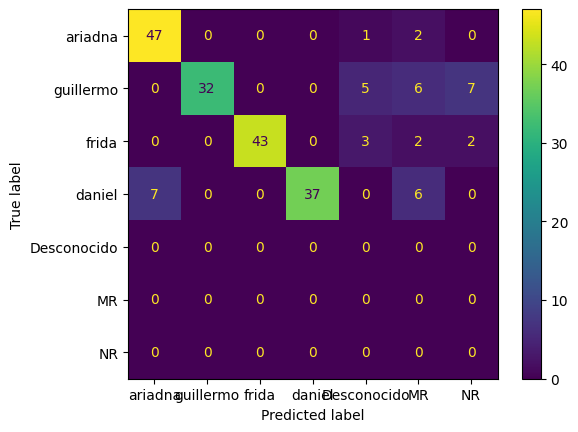

In [123]:
confusion_matrix = metrics.confusion_matrix(y_true, y_pred, labels=["ariadna","guillermo","frida","daniel","Desconocido", "MR","NR"])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["ariadna","guillermo","frida","daniel","Desconocido", "MR","NR"])
cm_display.plot()
plt.show()

In [122]:
#Se imprimen las variables obtenidas de la matríz
accuracy = metrics.accuracy_score(y_true, y_pred)
print('Accuracy:',accuracy)
precision = metrics.precision_score(y_true, y_pred, average='macro')
print("Precision:",precision)
recall = metrics.recall_score(y_true, y_pred, average='macro')
print("Recall:",recall)
fone = metrics.f1_score(y_true, y_pred, average='macro')
print('Fone:',fone)

Accuracy: 0.795
Precision: 0.5529100529100529
Recall: 0.4542857142857143
Fone: 0.49423426488051136


c:\Users\frida\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
